In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import timedelta

In [74]:
plt.rcParams["figure.figsize"] = (15,10)

# Explore electricity demand forecasting for England and Wales

1. Import datasets
2. Data Preparation

# Import datasets

In [92]:
# Import datasets, prepare and combine
df = pd.DataFrame()
datasets = os.listdir('./datasets')

path = os.getcwd()

print('datasets used :')
for dataset in datasets:
    print(dataset)
    df2 = pd.read_csv(path + '\\datasets\\' + dataset)
    df = pd.concat([df,df2], axis=0, ignore_index =True, sort=False)

datasets used :
DemandData_2017.csv
DemandData_2018.csv
DemandData_2019.csv
DemandData_2020.csv


# Data Preparation

In [78]:
# Convert settlement date and settlement period into datetime.
df['SETTLEMENT_DATE'] = pd.to_datetime(df['SETTLEMENT_DATE'], format='%d-%b-%Y')
#Push the data to the start of the settlement period. Avoids problems between days at midnight
df['minutes'] = (df['SETTLEMENT_PERIOD']*30)-30

df['hours'] = (df['minutes']/60).apply(np.floor).astype(int).astype(str)

df['hours'] = df['hours'].str.pad(2,side='left',fillchar='0')

df['mins_left'] = (df['minutes']%60).apply(np.floor).astype(int).astype(str)
df['mins_left'] = df['mins_left'].str.pad(2,side='right', fillchar ='0')

df['time'] = df['hours'] + ':' + df['mins_left']

df['SETTLEMENT_DATE'] = df['SETTLEMENT_DATE'].astype(str) + ' ' + df['time']

In [93]:
# We have a case where we more half hours than in the day - 29-10-2017
df = df[~df['SETTLEMENT_DATE'].str.contains('24:')]


In [88]:
df.head(54)

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,I014_ND,TSD,I014_TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,...,EAST_WEST_FLOW,I014_FRENCH_FLOW,I014_BRITNED_FLOW,I014_MOYLE_FLOW,I014_EAST_WEST_FLOW,NEMO_FLOW,minutes,hours,mins_left,time
0,2017-01-01 00:00:00,1,27316,27117,28013,27833,24789,1514,4871,0,...,233,947,857,296,240,NaN,0,00,00,00:00
1,2017-01-01 00:30:00,2,27900,27706,28539,28329,25486,1518,4871,0,...,287,986,874,297,286,NaN,30,00,30,00:30
2,2017-01-01 01:00:00,3,27588,27286,28279,27916,25254,1543,4871,0,...,287,986,816,297,286,NaN,60,01,00,01:00
3,2017-01-01 01:30:00,4,26456,26169,27819,27550,24270,1567,4871,0,...,287,986,828,297,287,NaN,90,01,30,01:30
4,2017-01-01 02:00:00,5,25429,25150,27565,27316,23409,1601,4871,0,...,281,986,855,297,281,NaN,120,02,00,02:00
5,2017-01-01 02:30:00,6,24754,24528,26738,26550,22785,1634,4871,0,...,287,986,855,297,286,NaN,150,02,30,02:30
6,2017-01-01 03:00:00,7,23789,23615,26018,25864,21835,1647,4871,0,...,287,986,855,281,286,NaN,180,03,00,03:00
7,2017-01-01 03:30:00,8,22935,22742,25430,25365,20987,1659,4871,0,...,287,985,855,258,286,NaN,210,03,30,03:30
8,2017-01-01 04:00:00,9,22352,22194,24720,24908,20498,1672,4871,0,...,287,311,855,163,286,NaN,240,04,00,04:00
9,2017-01-01 04:30:00,10,22037,21870,24493,24579,20165,1684,4871,0,...,287,313,855,240,286,NaN,270,04,30,04:30


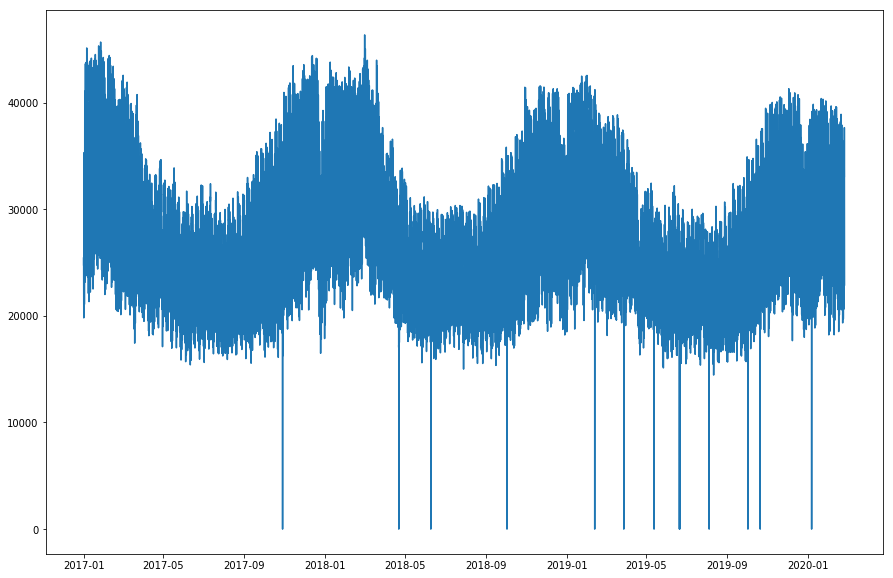

In [89]:
plt.plot(df['SETTLEMENT_DATE'], df['ENGLAND_WALES_DEMAND'])

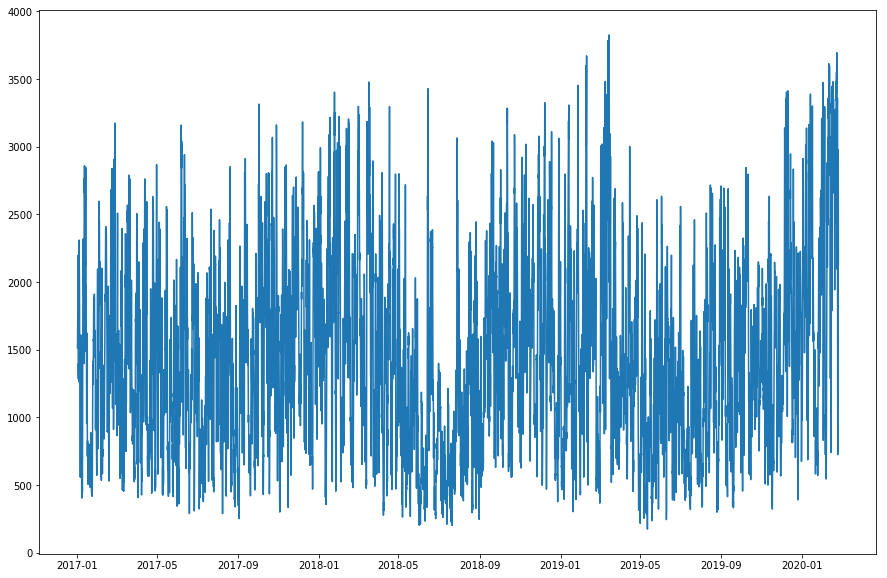

In [90]:
plt.plot(df['SETTLEMENT_DATE'], df['EMBEDDED_WIND_GENERATION'])
